 # ~ ******** " PHISHING DOMAIN DETECTION "  ******** ~

### 1. Define Objective : 

##### 1.1 AIM / OBJECTIVES: 

~~ The primary objective of this project is to develop an automated, accurate, and reliable machine learning model 
     capable of distinguishing between legitimate and phishing domains.

~~ This tool will help in identifying and mitigating phishing attacks, thereby enhancing the cybersecurity infrastructure 
     for individuals and organizations.

~~ Predict whether a domain is real or malicious.

@SPECIFIC OBJECTIVES :~
    
   * Build a Predictive Model
   * Enhance Cybersecurity Measures
   * Improve Detection Accuracy
   * Real-Time Detection
   * Continuous Learning and Adaptation

### 2. Gather Data :

##### 2.1 IMPORT LIBRABIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


##### 2.2 LOAD THE DATASET

In [4]:
Phish_scan=pd.read_csv('Phish_data.csv')

In [5]:
Phish_scan

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0


### 3. Data Exploration :

##### 3.1 FAMILIARIZING WITH DATA

In [8]:
# Calculating the total number of Rows and Columns are present in this dataset
rows,cols = Phish_scan.shape
print(f"Total number of rows \t: {rows} \nTotal number of columns : {cols}")

Total number of rows 	: 58645 
Total number of columns : 112


In [9]:
Phish_scan.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [10]:
Phish_scan.columns[0:56]

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
       'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain',
       'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain',
       'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain',
       'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain',
       'domain_length', 'domain_in_ip', 'server_client_domain',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
     

In [11]:
Phish_scan.columns[56:112]

Index(['qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params', 'qty_at_params',
       'qty_and_params', 'qty_exclamation_params', 'qty_space_params',
       'qty_tilde_params', 'qty_comma_params', 'qty_plus_params',
       'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params',
       'qty_percent_params', 'params_length', 'tld_present_params',
       'qty_params', 'email_in_url', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'time_domain_expi

In [12]:
Phish_scan.dtypes[0:56]

qty_dot_url                   int64
qty_hyphen_url                int64
qty_underline_url             int64
qty_slash_url                 int64
qty_questionmark_url          int64
qty_equal_url                 int64
qty_at_url                    int64
qty_and_url                   int64
qty_exclamation_url           int64
qty_space_url                 int64
qty_tilde_url                 int64
qty_comma_url                 int64
qty_plus_url                  int64
qty_asterisk_url              int64
qty_hashtag_url               int64
qty_dollar_url                int64
qty_percent_url               int64
qty_tld_url                   int64
length_url                    int64
qty_dot_domain                int64
qty_hyphen_domain             int64
qty_underline_domain          int64
qty_slash_domain              int64
qty_questionmark_domain       int64
qty_equal_domain              int64
qty_at_domain                 int64
qty_and_domain                int64
qty_exclamation_domain      

In [13]:
Phish_scan.dtypes[56:112]

qty_percent_directory        int64
directory_length             int64
qty_dot_file                 int64
qty_hyphen_file              int64
qty_underline_file           int64
qty_slash_file               int64
qty_questionmark_file        int64
qty_equal_file               int64
qty_at_file                  int64
qty_and_file                 int64
qty_exclamation_file         int64
qty_space_file               int64
qty_tilde_file               int64
qty_comma_file               int64
qty_plus_file                int64
qty_asterisk_file            int64
qty_hashtag_file             int64
qty_dollar_file              int64
qty_percent_file             int64
file_length                  int64
qty_dot_params               int64
qty_hyphen_params            int64
qty_underline_params         int64
qty_slash_params             int64
qty_questionmark_params      int64
qty_equal_params             int64
qty_at_params                int64
qty_and_params               int64
qty_exclamation_para

In [14]:
# By default giving top 5 data of the dataset which we generally called "head" Phish_scan.head()
Phish_scan.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [15]:
# By default giving bottom 5 data of the dataset which we generally called "tail"
Phish_scan.tail()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0
58644,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3361,1,0,0,0,0,0


In [16]:
Phish_scan.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
Phish_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


#####  3.2 STATISTICAL ANALYSIS

In [19]:
Phish_scan.mean()

qty_dot_url             2.284338
qty_hyphen_url          0.457123
qty_underline_url       0.171285
qty_slash_url           1.937522
qty_questionmark_url    0.014102
                          ...   
qty_redirects           0.303419
url_google_index        0.001279
domain_google_index     0.002234
url_shortened           0.008287
phishing                0.522585
Length: 112, dtype: float64

In [20]:
Phish_scan.median()

qty_dot_url             2.0
qty_hyphen_url          0.0
qty_underline_url       0.0
qty_slash_url           1.0
qty_questionmark_url    0.0
                       ... 
qty_redirects           0.0
url_google_index        0.0
domain_google_index     0.0
url_shortened           0.0
phishing                1.0
Length: 112, dtype: float64

In [21]:
Phish_scan.mode

<bound method DataFrame.mode of        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                2               0                  0              0   
1                4               0                  0              2   
2                1               0                  0              1   
3                2               0                  0              3   
4                1               1                  0              4   
...            ...             ...                ...            ...   
58640            1               0                  0              5   
58641            2               0                  0              0   
58642            5               6                  3              6   
58643            2               0                  0              0   
58644            2               0                  0              3   

       qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                         0     

##### 3.3 DATA CLEANING 

###### 3.3.1 Calculating missing values

In [24]:
Nans= Phish_scan.isnull().sum().sum()
print(Nans)

0


### 4. Feature Engineering:

##### 4.1 Converting the float column in numeric column

In [27]:
Phish_scan['time_response']=Phish_scan['time_response'].astype(int)

In [28]:
Phish_scan['time_response']

0        0
1        1
2        3
3        0
4        0
        ..
58640    2
58641    0
58642    0
58643    0
58644    0
Name: time_response, Length: 58645, dtype: int32

##### 4.3 Feature Extraction

###### 4.3.1 URL-Based Features

(i) LENGTH OF THE URL :

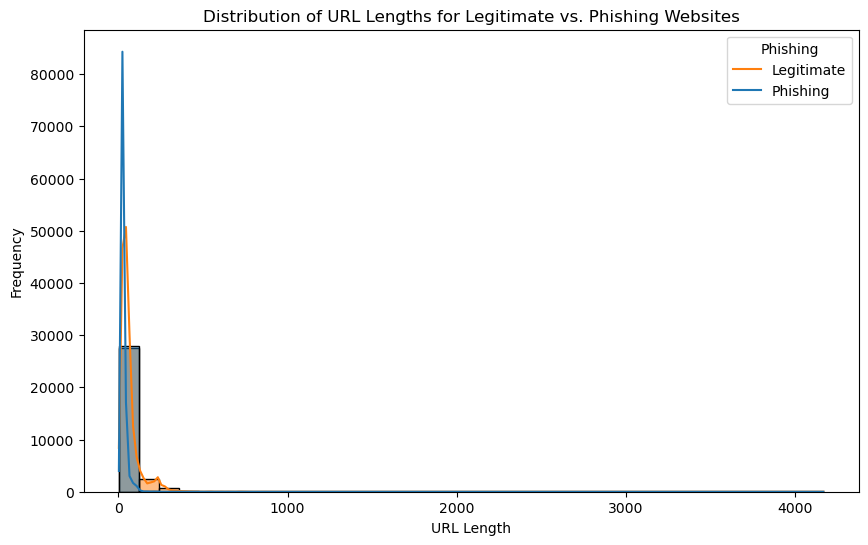

In [30]:
Phish_scan['url_length'] = Phish_scan['length_url']

# Plot the distribution of URL lengths for legitimate vs. phishing websites
plt.figure(figsize=(10, 6))
sns.histplot(data=Phish_scan, x='url_length', hue='phishing', bins=35, kde=True)
plt.title('Distribution of URL Lengths for Legitimate vs. Phishing Websites')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.legend(title='Phishing', labels=['Legitimate', 'Phishing'])
plt.show()


(ii) NUMBER OF SPECIAL CHARACTERS :

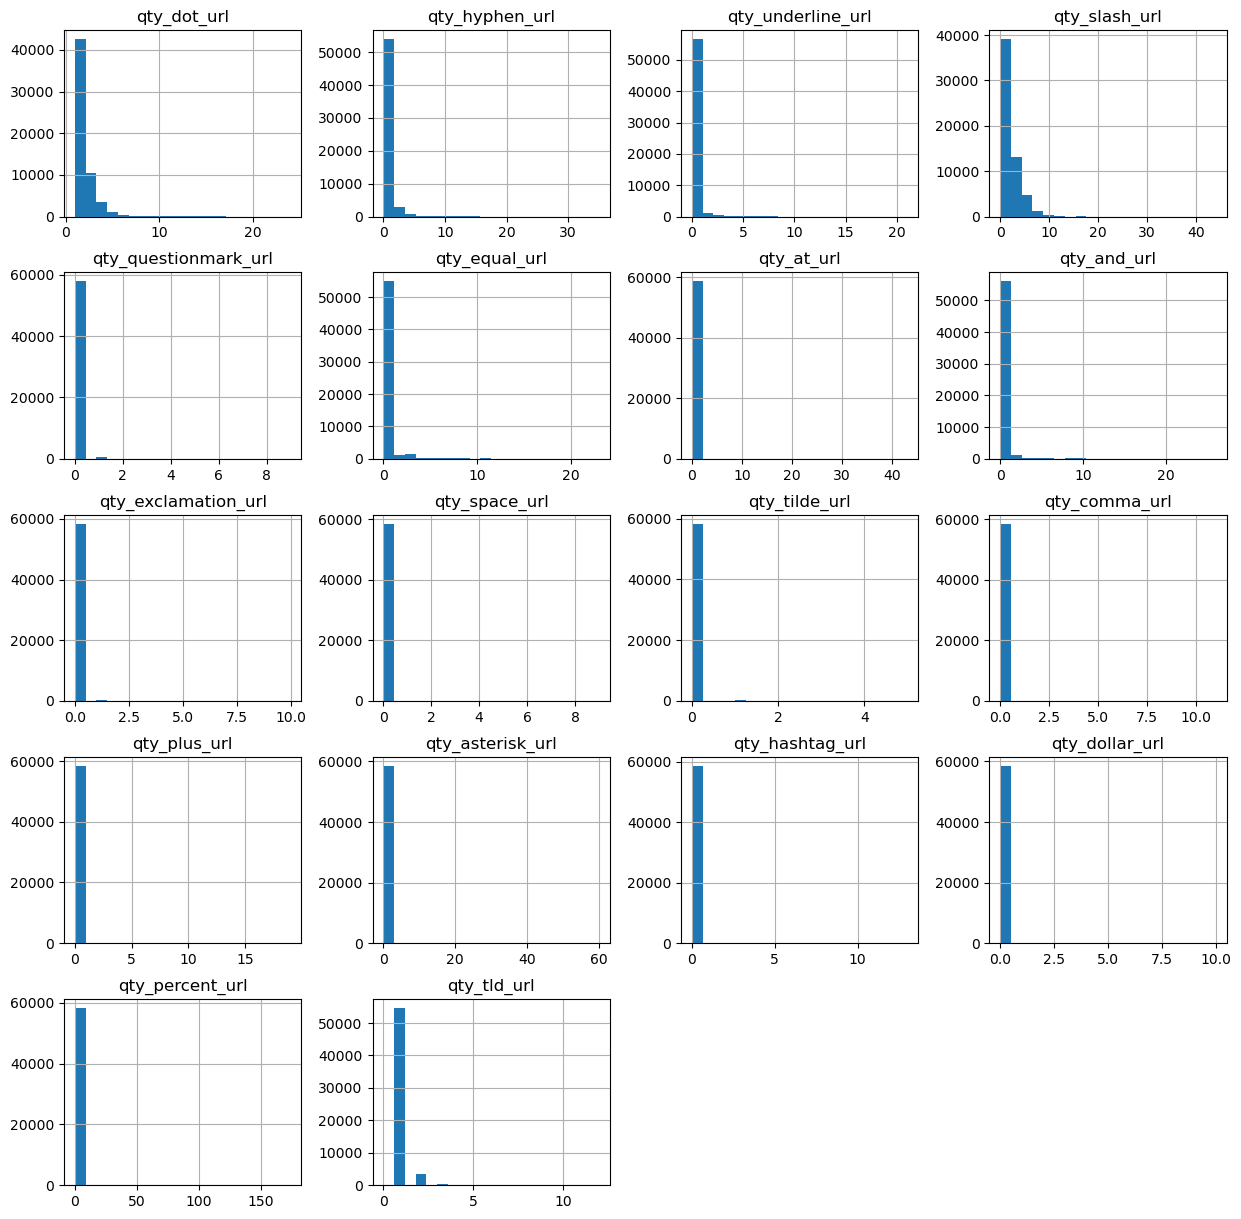

In [32]:
# Histograms for special characters in URL
special_char_columns = [col for col in Phish_scan.columns if 'qty_' in col and 'url' in col]

Phish_scan[special_char_columns].hist(bins=20, figsize=(15, 15))
plt.show()


###### 4.3.2 Domain-Based Features

(i) LENGTH OF THE DOMAIN :

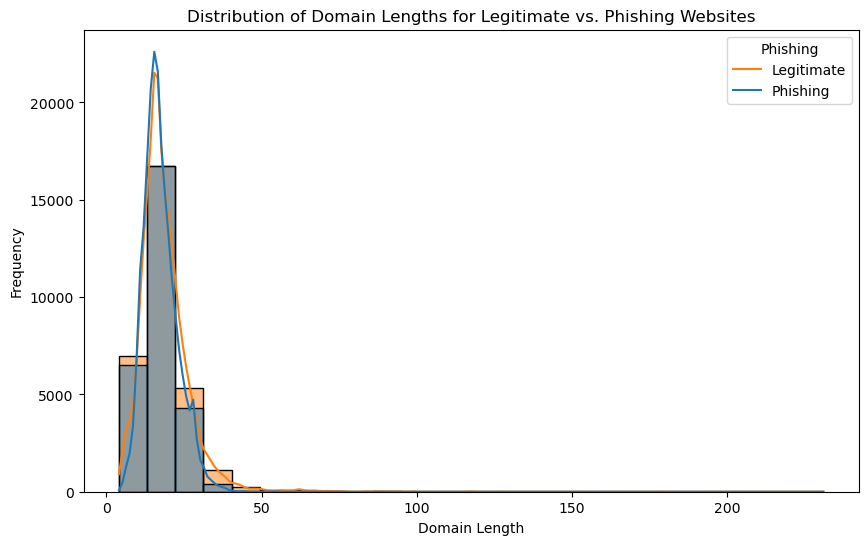

In [35]:
Phish_scan['domain_len'] = Phish_scan['domain_length']

# Plot the distribution of URL lengths for legitimate vs. phishing websites
plt.figure(figsize=(10, 6))
sns.histplot(data=Phish_scan, x='domain_len', hue='phishing', bins=25, kde=True)
plt.title('Distribution of Domain Lengths for Legitimate vs. Phishing Websites')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.legend(title='Phishing', labels=['Legitimate', 'Phishing'])
plt.show()


(ii) NUMBER OF SPECIAL CHARACTERS :

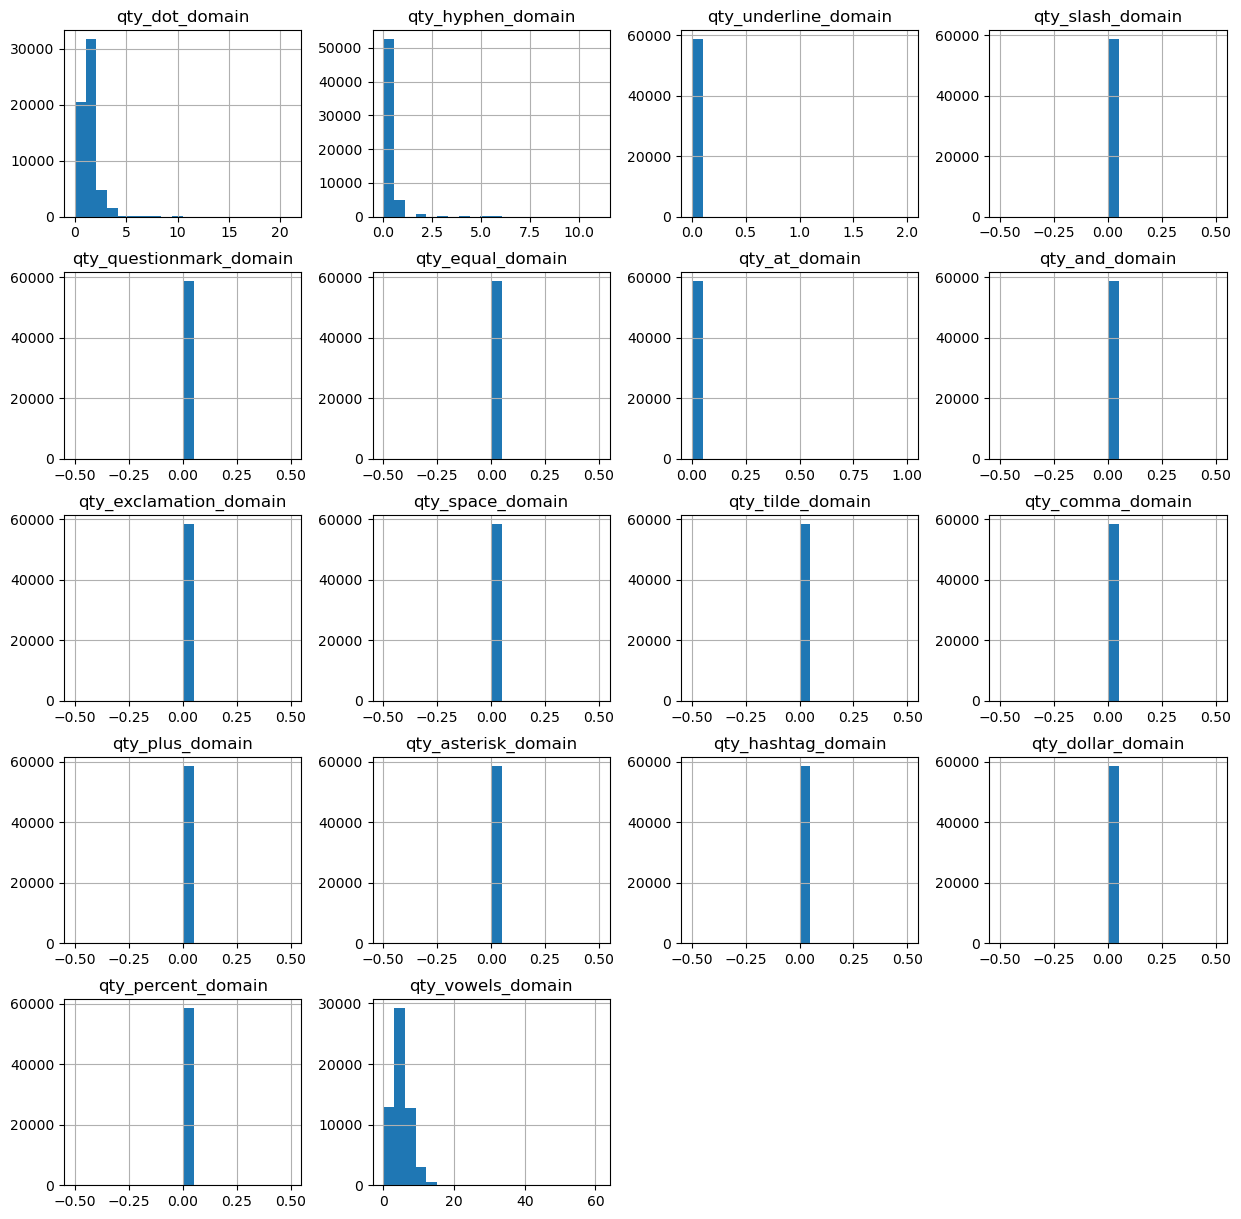

In [37]:
# Histograms for special characters in URL
special_char_columns = [col for col in Phish_scan.columns if 'qty_' in col and 'domain' in col]

Phish_scan[special_char_columns].hist(bins=20, figsize=(15, 15))
plt.show()


(iii) Number of Vowels :

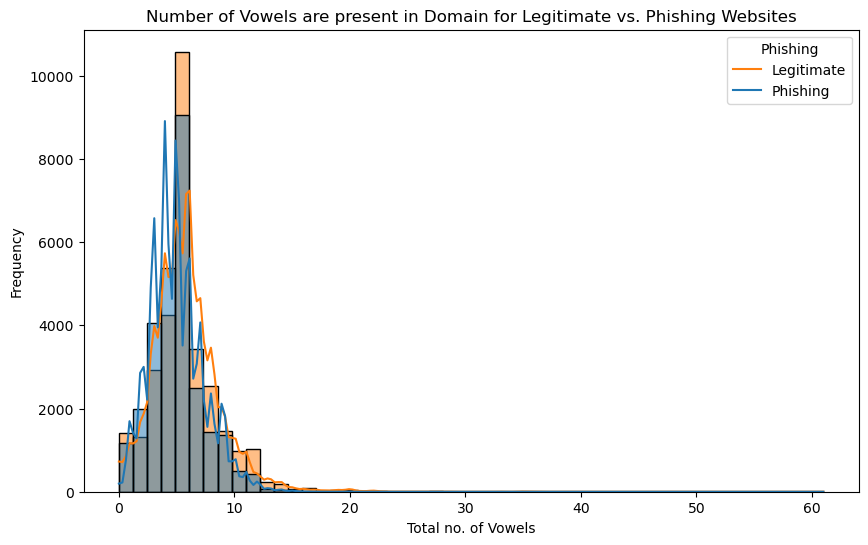

In [39]:
Phish_scan['vowels'] = Phish_scan['qty_vowels_domain']

# Plot the distribution of URL lengths for legitimate vs. phishing websites
plt.figure(figsize=(10, 6))
sns.histplot(data=Phish_scan, x='vowels', hue='phishing', bins=50, kde=True)
plt.title('Number of Vowels are present in Domain for Legitimate vs. Phishing Websites')
plt.xlabel('Total no. of Vowels')
plt.ylabel('Frequency')
plt.legend(title='Phishing', labels=['Legitimate', 'Phishing'])
plt.show()


(iv) Number of Domain in IP :

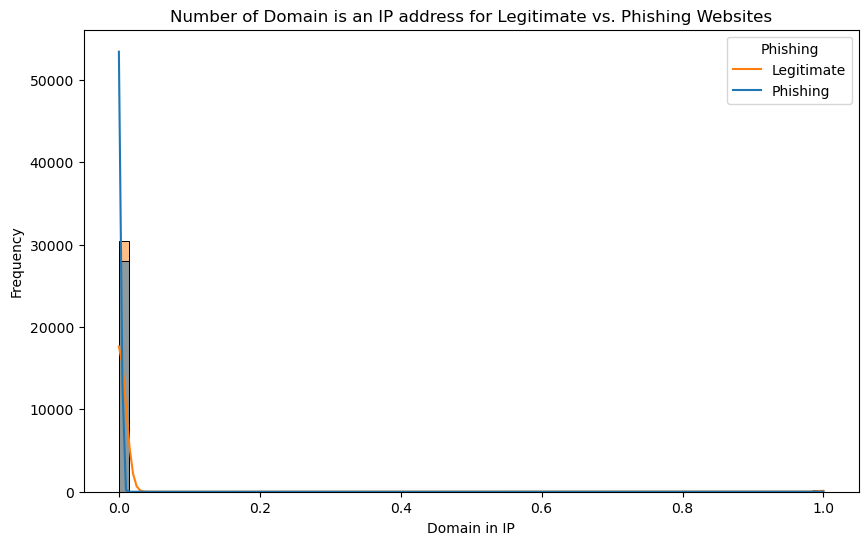

In [43]:
Phish_scan['ip'] = Phish_scan['domain_in_ip']

# Plot the distribution of URL lengths for legitimate vs. phishing websites
plt.figure(figsize=(10, 6))
sns.histplot(data=Phish_scan, x='ip', hue='phishing', bins=70, kde=True)
plt.title('Number of Domain is an IP address for Legitimate vs. Phishing Websites')
plt.xlabel('Domain in IP')
plt.ylabel('Frequency')
plt.legend(title='Phishing', labels=['Legitimate', 'Phishing'])
plt.show()


Domains using IP addresses can indicate phishing

(v) Domain includes typical server or client terms 

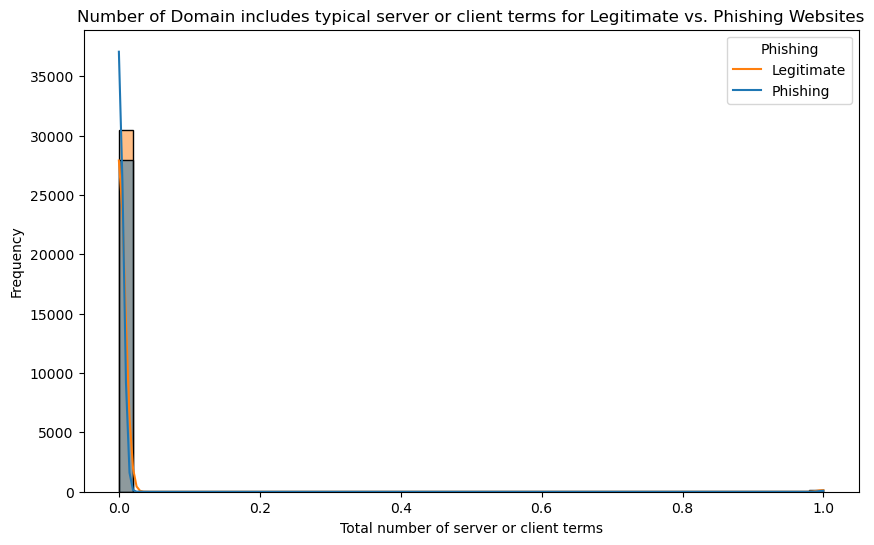

In [54]:
Phish_scan['server'] = Phish_scan['server_client_domain']

# Plot the distribution of URL lengths for legitimate vs. phishing websites
plt.figure(figsize=(10, 6))
sns.histplot(data=Phish_scan, x='server', hue='phishing', bins=50, kde=True)
plt.title('Number of Domain includes typical server or client terms for Legitimate vs. Phishing Websites')
plt.xlabel('Total number of server or client terms')
plt.ylabel('Frequency')
plt.legend(title='Phishing', labels=['Legitimate', 'Phishing'])
plt.show()


###### 4.3.3 Page-Based Features

(i) Length of the Directory

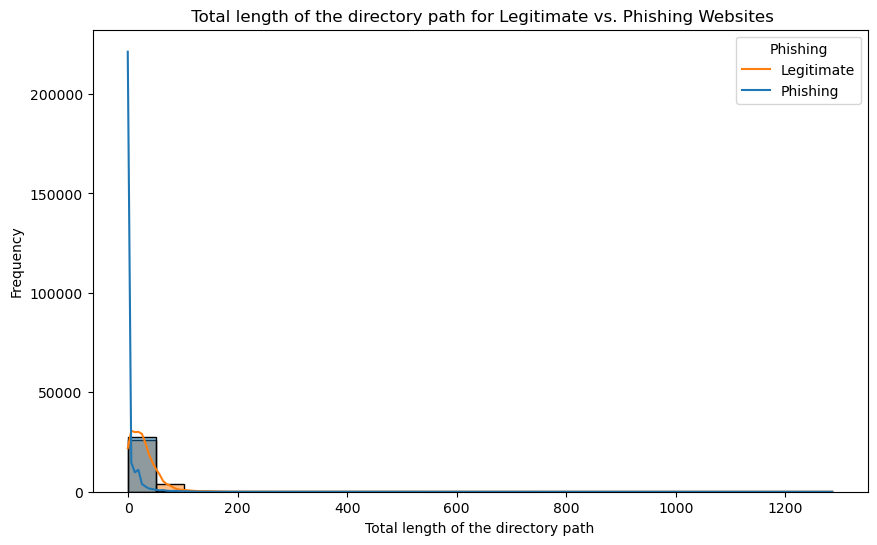

In [67]:
Phish_scan['dir_len'] = Phish_scan['directory_length']

# Plot the distribution of URL lengths for legitimate vs. phishing websites
plt.figure(figsize=(10, 6))
sns.histplot(data=Phish_scan, x='dir_len', hue='phishing', bins=25, kde=True)
plt.title(' Total length of the directory path for Legitimate vs. Phishing Websites')
plt.xlabel('Total length of the directory path')
plt.ylabel('Frequency')
plt.legend(title='Phishing', labels=['Legitimate', 'Phishing'])
plt.show()


(ii) Special Character Counts in Directory Path:

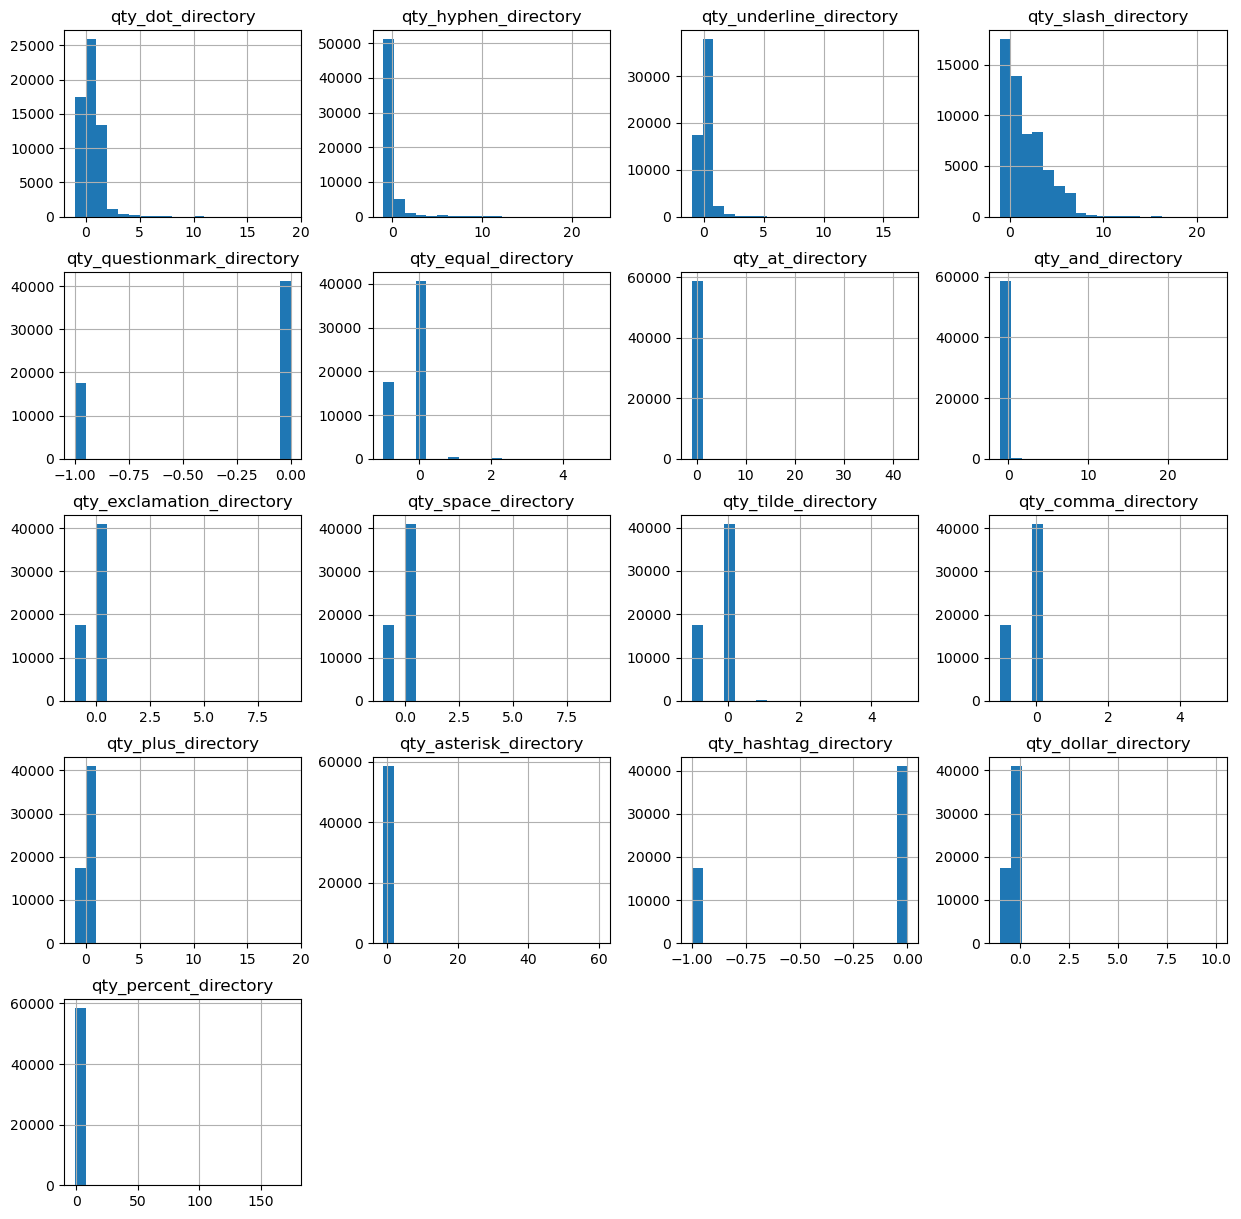

In [69]:
# Histograms for special characters in URL
special_char_columns = [col for col in Phish_scan.columns if 'qty_' in col and 'directory' in col]

Phish_scan[special_char_columns].hist(bins=20, figsize=(15, 15))
plt.show()


### 5. Model Selection:

(i) Model 1st

In [91]:
# Separate features and target variable
X = Phish_scan.drop(columns=['phishing'])
y = Phish_scan['phishing']

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [97]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(Xtrain, ytrain)


RandomForestClassifier(class_weight='balanced', random_state=42)

The classification report provides detailed metrics for each class (0 for non-phishing and 1 for phishing)

In [105]:
# Make predictions on the test set
y_pred = rf_model.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(ytest, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(ytest, y_pred))

# ROC AUC score
y_pred_proba = rf_model.predict_proba(Xtest)[:, 1]
roc_auc = roc_auc_score(ytest, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8400
           1       0.95      0.96      0.95      9194

    accuracy                           0.95     17594
   macro avg       0.95      0.95      0.95     17594
weighted avg       0.95      0.95      0.95     17594

Confusion Matrix:
[[7928  472]
 [ 364 8830]]
ROC AUC Score: 0.99


(ii) model 2nd

In [120]:
# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages to be run
    learning_rate=0.1,      # Learning rate shrinks the contribution of each tree
    max_depth=3,            # Maximum depth of the individual trees
    random_state=42
)

# Train the model
gbm_model.fit(Xtrain, ytrain)


GradientBoostingClassifier(random_state=42)

In [122]:
# Make predictions on the test set
y_pred = gbm_model.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(ytest, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(ytest, y_pred))

# ROC AUC score
y_pred_proba = gbm_model.predict_proba(Xtest)[:, 1]
roc_auc = roc_auc_score(ytest, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8400
           1       0.93      0.94      0.93      9194

    accuracy                           0.93     17594
   macro avg       0.93      0.93      0.93     17594
weighted avg       0.93      0.93      0.93     17594

Confusion Matrix:
[[7724  676]
 [ 568 8626]]
ROC AUC Score: 0.98
